<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El archivo con que se va a trabajar contiene diversas URLs a artículos sobre ML

Como características se tienen:

* **Title**: título del artículo
* **url**: ruta del artículo
* **Word count**: cantidada de palabras del artículo
* **# of Links**: los enlaces externos que contiene
* **# of comments**: cantidad de comentarios
* **# Images video**: suma de imágenes (o videos)
* **Elapse days**: cantidad de días transcurridos al momento de rear el archivo
* **#Shares**: columna de salida que representa la cantidad de veces que se compartió el articulo

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/articulos_ml.csv')
data.shape
#161 registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [ ]:
#Estadísticas básicas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


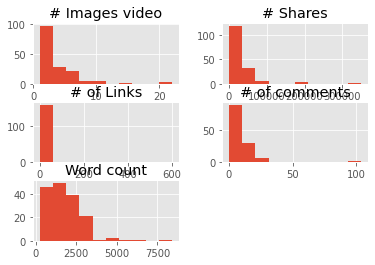

In [ ]:
#Se busca una correlación entre la cantidad de palabras del texto 
#y la cantidad de shares obtenidos

data.drop(['Title', 'url', 'Elapsed days'], 1).hist()
plt.show()

Text(0, 0.5, '# Shares')

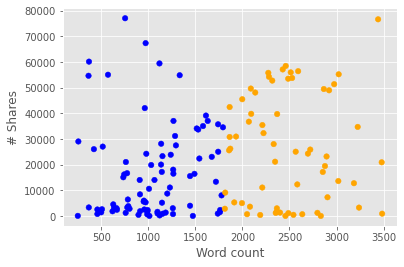

In [ ]:
#Se filtran los que tengan más de 3500 palabras y más de 80000 compartidos

filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

#Esto se grafica pintando en azul los puntos con menos de 1808 palabras (la media)
#y en naranja los que tengan más

colores = ['orange', 'blue']
tamanios = [30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

asignar = []
for index, row in filtered_data.iterrows():
  if(row['Word count'] > 1808):
    asignar.append(colores[0])
  else:
    asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Word count')
plt.ylabel('# Shares')

## Regresión lineal simple (1 variable)

y = m * X + b

In [ ]:
#Generando datos para realizar la regresión lineal

dataX = filtered_data[['Word count']]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Se realizan las predicciones para generar la línea
y_pred = regr.predict(X_train)

print('Coefficients (m): \n', regr.coef_)
print('Independent term (b) \n:', regr.intercept_)
print('Mean squared error: ', mean_squared_error(y_train, y_pred))
print('Variance score: ', r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
Independent term 
: 11200.30322307416
Mean squared error:  372888728.3398661
Variance score:  0.05519842281951404


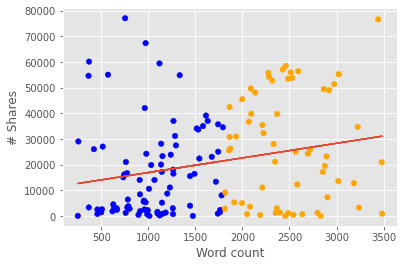

In [ ]:
#GRaficando la recta
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('Word count')
plt.ylabel('# Shares')

recta = regr.coef_ * X_train + regr.intercept_
plt.plot(Xtrain, recta)

plt.show()

In [ ]:
#Predicción para un artículo de 2000 palabras

y_1 = regr.predict([[2000]])
print(int(y_1))

22595


## Regresión lineal múltiple

y = b + m1 * X1 + m2 * X2 + ... + m(n) * X(n)

Se usarán 2 entradas **cantidad de palabras** y **suma de las 3 columnas: cantidad de enlaces, comentarios y cantidad de imágenes**

In [ ]:
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2['Word count'] = filtered_data['Word count']
dataX2['suma'] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
z_pred = regr2.predict(XY_train)

print('Coefficients: \n', regr2.coef_)
print('Intercept: \n', regr2.intercept_)
print('Mean squared error: ', mean_squared_error(z_train, z_pred))
print('Variance score: ', r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Intercept: 
 16921.891098343356
Mean squared error:  352122816.4791501
Variance score:  0.107813760282097


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

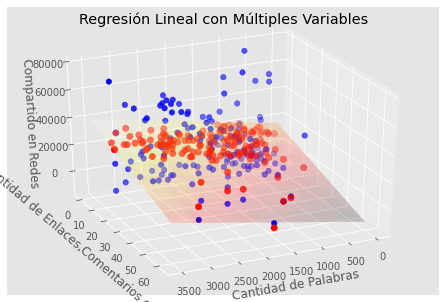

In [ ]:
#Graficando

fig = plt.figure()
ax = Axes3D(fig)

#Se crea la malla
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#Valores del plano
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

#Se calculan los valores para Z
z = (nuevoX + nuevoY + regr2.intercept_)

#Se gradica el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

#En azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30)

#En rojo los valored de la predicción
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40)

#Se cambia el ángulo del plano
ax.view_init(elev = 30., azim = 65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [ ]:
#Predicción para un artículo con 2000 palabras,
#10 enlaces, 4 comentarios y 6 imágenes

z1 = regr2.predict([[2000, 10+4+6]])
print(int(z1))

20518
